TRABALHO 2 - ANÁLISE DE DADOS E EXTRAÇÃO DE CONHECIMENTO
#NOMES = [
#&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;'Gabriel Valentim Xavier de Arruda',
#&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;'Eduardo Londero Vieira'
#]


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from pandas.plotting import scatter_matrix
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer

In [ ]:
url = './Wine.txt'
attributes = ["fixed acidity","volatile acidity","citric acid","residual sugar",
              "chlorides","free sulfur dioxide","total sulfur dioxide",
              "density","pH","sulphates","alcohol","quality"]
dataset = pd.read_csv(url, names=attributes)
dataset.columns = attributes
# dataset['alcool'] = pd.to_numeric(dataset['alcool'], errors='coerce')
# dataset['alcool'] = pd.to_numeric(dataset['alcool'], errors='coerce').fillna(0)

Printa o total de amostras (registros) e atributos do dataset

In [ ]:
print(dataset.shape)

Printa um número x de linhas com os dados dos vinhos em uma tabela

In [ ]:
x = 4
print(dataset.head(x))

Resumo estatístico: apresenta infos como média, desvio padrão, menor e maior valor

In [ ]:
print(dataset.describe())

O Bloco a seguir printa o número de vinhos agrupados por qualidade, ou seja, vai apresentar o número de vinhos que têm o mesmo nível de qualidade


In [ ]:
print(dataset.groupby('quality').size())

O código a seguir apresenta uma amostra aleatória de 5 linhas do dataset.

In [ ]:
print(dataset.sample(5))

O código a seguir conta o número de vinhos existentes com o seu valor de qualidade:
1. Cria um gráfico em formato de pizza;
2. Adiciona ao gráfico o número de vinhos em cada qualidade;
3. Define os rótulos do gráfico baseado nas qualidades existentes nos vinhos;
4. Formata o percentual do gráfico;
5. Garante que o gráfico seja uma pizza circular.



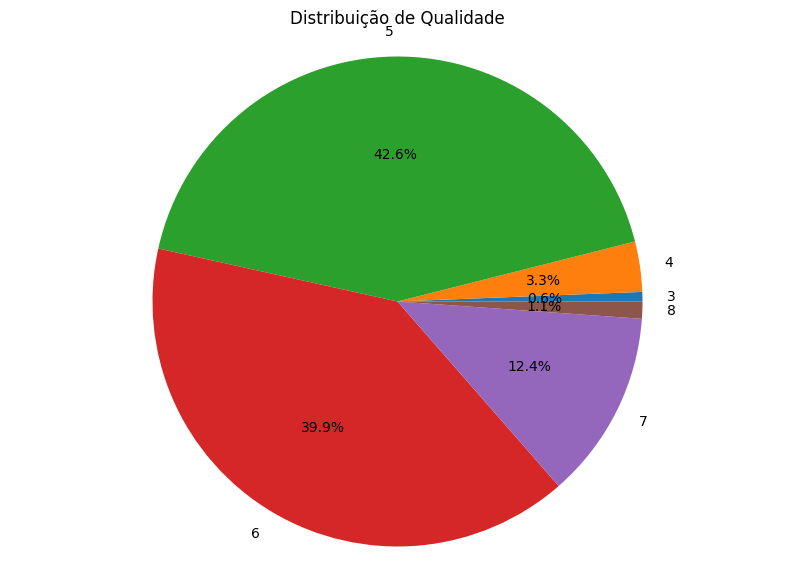

In [ ]:
quality_count = dataset['quality'].value_counts().sort_index()
fig, ax = plt.subplots(figsize=(10, 7))

ax.set_title("Distribuição de Qualidade")
ax.pie(quality_count, labels=quality_count.index, autopct='%1.1f%%')
ax.axis('equal')
plt.show()

A média da acidez volátil varia para diferentes níveis de qualidade dos produtos. A qualidade pode influenciar a acidez volátil média nos vinhos.

1. Agrupa o dataset por qualidade e seleciona a coluna 'acidez_vol' para análise;
2. Calcula a média da acidez volátil para cada level de qualidade;
3. Os valores médios de acidez volátil ficam no eixo Y;
4. Os valores de qualidade ficam no eixo X;
5. O gráfico é marcado com pontos ao longo da linha para mostrar a variação dos dados, ou seja, cada qualidade específica é marcada com um círculo.



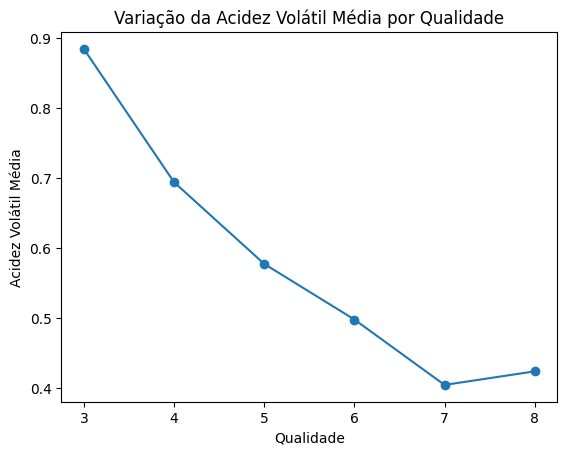

In [ ]:
dataset.groupby('quality')['volatile acidity'].mean().plot.line(marker='o')
plt.xlabel('Qualidade')
plt.ylabel('Acidez Volátil Média')
plt.title('Variação da Acidez Volátil Média por Qualidade')
plt.show()

O código abaixo utiliza o dataset para realizar aprendizado de máquina com alguns algoritmos para esse objetivo:

* Define um número especial, uma semente (seed), para gerar números aleatórios consistentes para garantir reprodutibilidade dos resultados.
* Divide os valores do dataset em dois arrays:
  1. Array com colunas para treinar a máquina
  2. Array com a coluna de resultado baseado nas outras colunas

* Define a quantidade de dados que será utilizada para treinamento e quantidade de dados usada para validação
* Utiliza a classe SimpleImputer para substituir os valores ausentes pela média dos valores não ausentes no mesmo atributo e aplica esse objetivo na chamada do método fit_transform passando o array com as colunas que treinarão a máquina
* Treina a máquina utilizando 6 algoritmos: LogisticRegression, LinearDiscriminantAnalysis, KNeighborsClassifier, DecisionTreeClassifier, GaussianNB e SVC
* É realizado uma validação cruzada e estima o desempenho dos algoritmos de aprendizado de máquina
* Usa acurácia como método de avaliação. Esse método mede a proporção de instâncias classificadas corretamente em relação ao total de instâncias avaliadas. O seu valor varia de 0.0 até 1.0

* Caractetísticas dos algoritmos:
  1. Logistic Regression (LR): Utiliza regressão logística para classificação. Separa as classes ajustando a curva logística. Gera a acurácia pela proporção de instâncias corretamente classificadas usando a regressão lógica. O objetivo da regressão logística é prever a probabilidade de ocorrência de um evento ou a pertinência de uma amostra a uma determinada classe.
  2. Linear Discriminant Analysis (LDA): tenta encontrar combinações lineares dos atributos de forma que maximizem a separação entre as classes. Realiza as classficações baseadas em projeções dos dados em espaços de menor dimensão
  3. K-Nearest Neighbors (KNN): Classifica uma instância com base nas classes das instâncias vizinhas mais próximas, calculando a distância entre os pontos e classifica a instância com base nas classes dos vizinhos mais próximos
  4. Decision Tree (CART): Usa uma árvore de decisão que utiliza regas de decisão que dividem os dados em subconjuntos cada vez mais filtrados em relação à classe
  5. Gaussian Naive Bayes (NB): utiliza o Teorema de Bayes. Assume que os atributos seguem uma distribuição Gaussiana e estima os parâmetros das distribuições para cada classe
  6. Support Vector Machine (SVM): acha um hiperplano adequado para separar as classes maximizando a margem entre elas. Mapeia os dados em um espaço de alta dimensão e faz a classificação com base na posição dos pontos em relação ao hiperplano

In [ ]:
seed = 7
scoring = 'accuracy'

array = dataset.values
X = array[:,0:11]
Y = array[:,11]
validation_size = 0.20

X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(
    X, Y, test_size=validation_size, random_state=seed)

imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)

models = [
    ('LR', LogisticRegression(solver='liblinear', multi_class='ovr')),
    ('LDA', LinearDiscriminantAnalysis()),
    ('KNN', KNeighborsClassifier()),
    ('CART', DecisionTreeClassifier()),
    ('NB', GaussianNB()),
    ('SVM', SVC(gamma='auto'))
]

results = []
names = []

for name, model in models:
   kfold = model_selection.KFold(n_splits=30, random_state=seed, shuffle=True)
   cv_results = model_selection.cross_val_score(model, X_train, Y_train,
                                                cv=kfold, scoring=scoring)
   results.append(cv_results)
   names.append(name)
   msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
   print(msg)

O código a seguir escolhe um dos algoritmos de aprendizado de máquina e o análisa utilizando relatório de classificação e matriz de confusão

* Matriz de confusão:
  1. Apresenta a contagem de amostras de cada classe contra a classe prevista no modelo
  2. As linhas apresentam a classe real e as colunas a classe prevista

* Relatório de classificação:
  1. Precisão: proporção de amostras previstas corretamente para uma determinada classe em relação ao total de amostras previstas para essa classe
  2. Recall: proporção de amostras previstas corretamente para uma determinada classe em relação ao total de amostras reais dessa classe
  3. F1: média harmônica entre previsão e recall
  4. Suporte: número de amostras reais de cada classe
  5. Macro avg: média aritmética das métricas (precisão, recall, f1-score) calculadas para cada classe individualmente.
  6. Weighted avg: média ponderada das métricas (precisão, recall, f1-score) com base no suporte de cada classe.

* Quando uma classe não possui amostras verdadeiros, o cálculo das métricas pode resultar em uma divisão por zero, o que gera um erro. Mas definindo 'zero_division=1', é especificado que em caso de uma divisão por zero ao calcular as métricas, o valor deve ser definido como 1 em vez de gerar um erro.

In [ ]:
lr = LogisticRegression(solver='liblinear', multi_class='ovr')
lr.fit(X_train, Y_train)
predictions = lr.predict(X_validation)
print("Accuracy score: ", accuracy_score(Y_validation, predictions))
print("\n \n")
print("Confusion Matriz:\n")
print(confusion_matrix(Y_validation, predictions))
print("\n \n")
print("Classification Report:\n")
print(classification_report(Y_validation, predictions, zero_division=1))

In [ ]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, Y_train)
predictions = lda.predict(X_validation)
print("Accuracy score: ", accuracy_score(Y_validation, predictions))
print("\n \n")
print("Confusion Matriz:\n")
print(confusion_matrix(Y_validation, predictions))
print("\n \n")
print("Classification Report:\n")
print(classification_report(Y_validation, predictions, zero_division=1))

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_validation)
print("Accuracy score: ", accuracy_score(Y_validation, predictions))
print("\n \n")
print("Confusion Matriz:\n")
print(confusion_matrix(Y_validation, predictions))
print("\n \n")
print("Classification Report:\n")
print(classification_report(Y_validation, predictions, zero_division=1))

In [ ]:
while True:
  cart = DecisionTreeClassifier()
  cart.fit(X_train, Y_train)
  predictions = cart.predict(X_validation)

  if accuracy_score(Y_validation, predictions) >= 0.7:
    break

print("Accuracy score: ", accuracy_score(Y_validation, predictions))
print("\n \n")
print("Confusion Matriz:\n")
print(confusion_matrix(Y_validation, predictions))
print("\n \n")
print("Classification Report:\n")
print(classification_report(Y_validation, predictions, zero_division=1))

In [ ]:
nb = GaussianNB()
nb.fit(X_train, Y_train)
predictions = nb.predict(X_validation)
print("Accuracy score: ", accuracy_score(Y_validation, predictions))
print("\n \n")
print("Confusion Matriz:\n")
print(confusion_matrix(Y_validation, predictions))
print("\n \n")
print("Classification Report:\n")
print(classification_report(Y_validation, predictions, zero_division=1))

In [ ]:
svm = SVC(gamma='auto')
svm.fit(X_train, Y_train)
predictions = svm.predict(X_validation)
print("Accuracy score: ", accuracy_score(Y_validation, predictions))
print("\n \n")
print("Confusion Matriz:\n")
print(confusion_matrix(Y_validation, predictions))
print("\n \n")
print("Classification Report:\n")
print(classification_report(Y_validation, predictions, zero_division=1))